In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import h5py
import argparse

from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
from skimage.transform import resize

In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
ls

adc.json  gdrive/  sample_data/


In [4]:
cd '/content/gdrive/My Drive/Colab Notebooks/Data3'

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Data3'
/content


<h2> 1. Data Preprocessing

In [0]:
hf = h5py.File('Brain_classification.h5', 'r')
[key for key in hf.keys()]

['imgs', 'labels']

In [0]:
imgs = hf.get('imgs')
labels = hf.get('labels')

In [0]:
imgs.shape

(3929, 256, 256)

In [0]:
labels.shape

(3929,)

In [0]:
img_rows = 96
img_cols = 96

def imgs_resize(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.float32)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_rows, img_cols), preserve_range=True)

    return imgs_p

In [0]:
def Z_score_norm_imgs(imgs):
  imgs = imgs.astype('float32')
  mean = np.mean(imgs)
  std = np.std(imgs)
  
  imgs -= mean
  imgs /= std
  
  return imgs

<h3> # Min-max normalization을 만들어보세요!

In [0]:
#Images resize
imgs = imgs_resize(imgs)
labels = np.array(labels, dtype=np.float32)

In [0]:
#Images normalization
imgs_N = Z_score_norm_imgs(imgs)

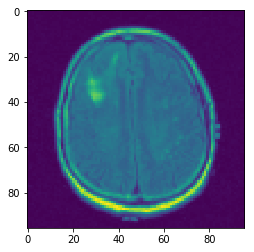

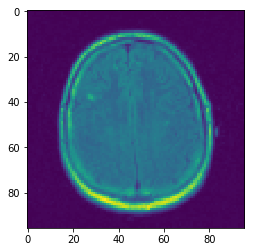

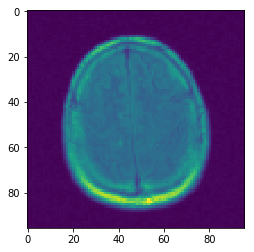

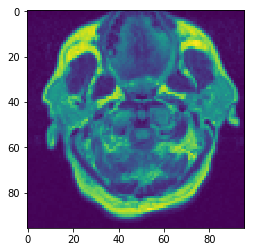

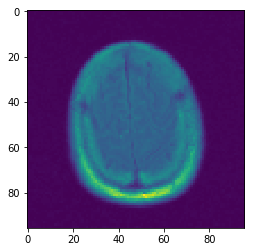

In [0]:
for i in range(8,13):
  plt.figure()
  plt.imshow(imgs_N[i])

In [0]:
for i in range(8,13):
  print(labels[i])

1.0
1.0
0.0
0.0
0.0


In [0]:
# Expand Dims


In [0]:
# Channel first


In [0]:
# Numpy to tensor


In [0]:
imgs_train = imgs[:3000]
labels_train = labels[:3000]

imgs_val = imgs[3000:3400]
labels_val = labels[3000:3400]

imgs_test = imgs[3400:]
labels_test = labels[3400:]

In [0]:
imgs_train = TensorDataset(imgs_train, labels_train)
imgs_val = TensorDataset(imgs_val, labels_val)
imgs_test = TensorDataset(imgs_test, labels_test)

<h2> 2. Model Architecture

<h3> # 본인만의 네트워크를 만들어 보세요!

In [0]:
# from https://github.com/pytorch/vision/blob/master/torchvision/models/vgg.py

cfg = {
    'vgg11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'vgg19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}        

In [0]:
# Sequential
class CNN(nn.Module):
    
    def __init__(self, model_mode, in_channels): # 생성자로 부터 각 parameters를 받아옮
        super(CNN, self).__init__()
        
        self.layers = self.make_layers(model_mode, in_channels)
        self.classifier = # nn.Sequential로 부터 Linear ReLU, Linear, Sigmoid 함수 구현하기
        
    # nn.Sequential로 부터 CNN 구현하기
    def make_layers(self, model_mode, in_channels):
        layers = []
        for x in cfg[model_mode]:
            if x == 'M':
                layers += [] # MaxPool2d 구현하기
            else :
                layers += [] # Conv2d 구현하기
                layers += [] # BatchNorm 구현하기
                layers += [] # ReLU 구현하기
                in_channels = x
        return nn.Sequential(*layers) # * python 문법 : 하나씩 넣어줌.
    
    def forward(self, x):
        x = self.layers(x) # sequential : 하나가 통째로 모델이 되어서
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        
        return x

In [0]:
# ModuleList
class CNN(nn.Module):
    
    def __init__(self, model_mode, in_channels):
        super(CNN, self).__init__()
        
        self.layers = self.make_layers(model_mode, in_channels)
        self.classifier = # nn.Sequential로 부터 Linear ReLU, Linear, Sigmoid 함수 구현하기
    
    # ModuleList <- append
    def make_layers(self, model_mode, in_channels):
        layers = nn.ModuleList()
        for x in cfg[model_mode]:
            if x == 'M':
                layers.append() # MaxPool2d 구현하기
            else :
                layers.append() # Conv2d 구현하기
                layers.append() # BatchNorm 구현하기
                layers.append() # ReLU 구현하기
                in_channels = x               
        return layers
    
    def forward(self, x):
        for layer in self.layers:
            x = layer(x) # ModuleList : layer 하나씩
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [0]:
def dimension_check():
    net = CNN('vgg16', 1)
    x = torch.randn(32, 1, 96, 96)
    y = net(x)
    print(y.size())

In [0]:
dimension_check()

torch.Size([32, 1])


In [0]:
# Parameters setting
parse = argparse.ArgumentParser()
args = parse.parse_args("")

args.device  = 'cuda' if torch.cuda.is_available() else 'cpu'
args.act = 'relu'
args.optim = 'Adam'
args.lr = 0.001
args.epoch = 30
args.train_batch_size = 32
args.val_batch_size = 32
args.test_batch_size = 32

#model
model = CNN('vgg16', 1).to(args.device)

#optimization
if args.optim == 'Adam':
    op = optim.Adam(model.parameters(), lr=args.lr)
elif args.optim == 'RMSprop':
    op = optim.RMSprop(model.parameters(), lr=args.lr)
else:
    raise ValueError('Optimiser Error!!')

#Loss
criterion = nn.BCELoss()

parts = {'train':imgs_train, 'val':imgs_val}

<h2> 3. Train & Evaluation Functions

In [0]:
def train(model, op, criterion, args):
    for epoch in range(args.epoch):
        for part in parts:
            loss_sum = 0
            if part == 'train':
                loader = # train DataLoader 구현하기
                model.train()
            else:
                loader = # validation DataLoader 구현하기
                model.eval()
                
            for Inputs, Labels in loader:
                Inputs = Variable(Inputs.to(args.device))
                Labels = Variable(Labels.to(args.device))
                
                # 1. clear the gradients of all optimized variables
                
                # 2. forward pass
                
                # 3. calculate the loss
                
                loss_sum += loss.item() # 1개의 원소를 가진 Tensor를 Python의 Scalar로 만들 때는 .item()함수를 사용한다.
                   
                if part == 'train':
                  
                    # 4. backward pass
                    
                    # 5. parameter update

            print('{} - epoch : {}, loss : {:2.2f}'.format(part, epoch+1, loss_sum/len(loader)))

In [0]:
train(model, op, criterion, args)

train - epoch : 1, loss : 0.67
val - epoch : 1, loss : 0.58
train - epoch : 2, loss : 0.48
val - epoch : 2, loss : 0.68
train - epoch : 3, loss : 0.45
val - epoch : 3, loss : 0.58
train - epoch : 4, loss : 0.44
val - epoch : 4, loss : 0.46
train - epoch : 5, loss : 0.43
val - epoch : 5, loss : 0.41
train - epoch : 6, loss : 0.42
val - epoch : 6, loss : 0.43
train - epoch : 7, loss : 0.42
val - epoch : 7, loss : 0.41
train - epoch : 8, loss : 0.41
val - epoch : 8, loss : 0.46
train - epoch : 9, loss : 0.42
val - epoch : 9, loss : 0.62
train - epoch : 10, loss : 0.39
val - epoch : 10, loss : 0.45
train - epoch : 11, loss : 0.37
val - epoch : 11, loss : 0.38
train - epoch : 12, loss : 0.36
val - epoch : 12, loss : 0.40
train - epoch : 13, loss : 0.33
val - epoch : 13, loss : 0.32
train - epoch : 14, loss : 0.27
val - epoch : 14, loss : 0.25
train - epoch : 15, loss : 0.25
val - epoch : 15, loss : 0.26
train - epoch : 16, loss : 0.21
val - epoch : 16, loss : 0.39
train - epoch : 17, loss :

In [0]:
# save
Path = './weight_classification_v1.pt'
torch.save(model.state_dict(), Path)

In [0]:
#load
model = CNN('vgg16', 1).to(args.device)
model.load_state_dict(torch.load("weight_classification_v1.pt"))

In [0]:
from torchvision.transforms import RandomCrop, Compose, ToPILImage


Results = []
Labels = []
testloader = torch.utils.data.DataLoader(imgs_test, batch_size=args.test_batch_size, shuffle = False, num_workers=2)
model.eval()

# predict all data from testloader
with torch.no_grad():
  for data in testloader:
    images, labels = data
    images = images.to(args.device)
    labels = labels.to(args.device)
    
    outputs = model(images)
    Results.extend(outputs.cpu().numpy().transpose(1,0)[0])
    Labels.extend(labels.cpu().numpy().transpose(1,0)[0])

<h3> 3.1. Receiver Operating Characteristic curve

In [0]:
# Expand Dims
score_values = np.array(Results)[..., np.newaxis]
labels = np.array(Labels)[..., np.newaxis]

In [0]:
# roc curve tools
from sklearn.metrics import roc_curve, auc

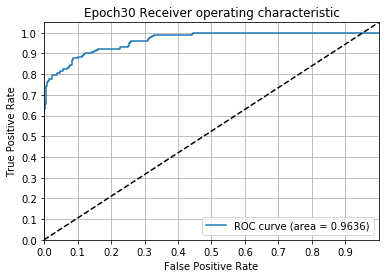

In [0]:
fpr, tpr, _ = roc_curve(labels,score_values)
roc_auc = auc(fpr,tpr)
    
fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
ax.plot([0, 1], [0, 1.05], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xticks(np.arange(0.0, 1.0, 0.1))
ax.set_yticks(np.arange(0.0, 1.05, 0.1))
ax.grid()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Epoch30 Receiver operating characteristic')
ax.legend(loc="lower right")

<h3> 3.2. Confusion Matrix


In [0]:
#confusion matrix
y_true = labels
y_pred = [1 if pred>0.5else 0 for pred in score_values]

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

figsize=(10,10)
cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

In [0]:
tmp = np.zeros((2, 2))
tmp[0][0] = cm[0][0]/(cm[0][0]+cm[0][1])
tmp[0][1] = cm[0][1]/(cm[0][0]+cm[0][1])
tmp[1][0] = cm[1][0]/(cm[1][0]+cm[1][1])
tmp[1][1] = cm[1][1]/(cm[1][0]+cm[1][1])
accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy : {:2.2}".format(accuracy))

Accuracy : 0.9


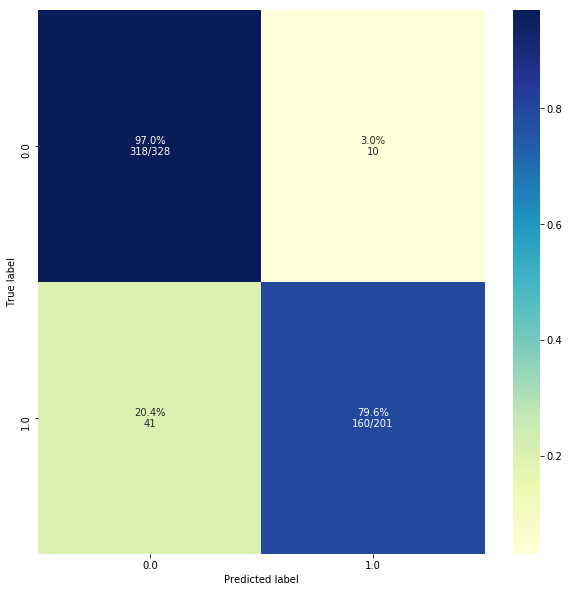

In [0]:
tmp = pd.DataFrame(tmp, index=np.unique(y_true), columns=np.unique(y_true))
tmp.index.name = 'True label'
tmp.columns.name = 'Predicted label'
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(tmp, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)